In [1]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
df_map = pd.read_csv('/content/drive/MyDrive/DA ASSIGNMENT/DATA/divvy_final.csv',parse_dates=['start_time', 'end_time'])

<ipython-input-2-757875827277>:1: DtypeWarning: Columns (4,6,8,9,10,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_map = pd.read_csv('/content/drive/MyDrive/DA ASSIGNMENT/DATA/divvy_final.csv',parse_dates=['start_time', 'end_time'])


In [3]:
df_map['startdate_time'] = pd.to_datetime(df_map['start_time'], errors='coerce')

In [4]:
df_map['dayoftheWeek'] = df_map['startdate_time'].dt.day_name()
df_map['Month'] = df_map['startdate_time'].dt.month_name()
df_map['Year'] = df_map['startdate_time'].dt.year
df_map['StartingTime']=df_map['startdate_time'].dt.time

In [5]:
df_map['dayoftheWeek'] = pd.Categorical(df_map['dayoftheWeek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)

week1=(df_map['dayoftheWeek'].value_counts()*100)/len(df_map)
week2 = week1.sort_index()

In [6]:
df_map['Month'] = pd.Categorical(df_map['Month'], categories= ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'],ordered=True)
month=df_map['Month'].value_counts()/1000
month = month.sort_index()

In [7]:
def identify_season(Month):
    season = None
    if Month == 'January' or Month == 'February' or Month == 'December':
        season = 'Winter'
    elif Month == 'March' or Month == 'April' or Month == 'May':
        season = 'Spring'
    elif Month == 'June' or Month == 'July' or Month == 'August':
        season = 'Summer'
    elif Month == 'September' or Month == 'October' or Month == 'November':
        season = 'Autumn'
    return season

In [8]:
season_list = []
for Month in df_map['Month']:
  season_list.append(identify_season(Month))
df_map['season'] = season_list

In [9]:
season_list = []
for Month in df_map['Month']:
  season_list.append(identify_season(Month))
df_map['season'] = season_list

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [14]:
df_map['ride_distance'] = np.sqrt( ((df_map['to_station_latitude'] - df_map['from_station_latitude'])**2) + ((df_map['to_station_longitude'] - df_map['from_station_longitude'])**2) )
    # formula for distance between two coordinates:
    # sqrt( (x2-x1)^2 + (y2-y1)^2 )
    # d = √((x2-x1)2 + (y2-y1)2)
df_map['ride_distance'] = df_map['ride_distance'] * 111.139

In [15]:
df_map['start_time'] = pd.to_datetime(df_map['start_time'])
df_map['end_time'] = pd.to_datetime(df_map['end_time'])

In [16]:
df_map['ride_length'] = (df_map['end_time']-df_map['start_time']).astype('timedelta64[s]')/60

In [17]:
df_map.dtypes

trip_id                          float64
start_time                datetime64[ns]
end_time                  datetime64[ns]
bikeid                           float64
tripduration                      object
from_station_id                  float64
from_station_name                 object
to_station_id                    float64
to_station_name                   object
usertype                          object
gender                            object
birthyear                        float64
Quarter                           object
station_name_x                    object
from_station_latitude            float64
from_station_longitude           float64
station_name_y                    object
to_station_latitude              float64
to_station_longitude             float64
startdate_time            datetime64[ns]
dayoftheWeek                    category
Month                           category
Year                             float64
StartingTime                      object
season          

In [18]:
df_map=df_map.drop(['station_name_x','station_name_y'], axis=1)

In [19]:
bikes = df_map.groupby(['bikeid']).count()['trip_id'].sort_values(ascending=False)

In [21]:
df_map['tripduration'] = df_map['tripduration'].str.replace(',', '').astype(float)

In [22]:
bike_number = bikes.index[0]
rides = bikes.iloc[0]
minutes_used = (df_map.groupby(['bikeid']).sum()['tripduration'] / 60).loc[bike_number]
print('Bike number : {} was ridden : {} times in 2017 for a total of : {} minutes which is the maximum of both the quarters (Q1 & Q2).'.format(bike_number, rides, int(minutes_used)))

Bike number : 5719.0 was ridden : 2728 times in 2017 for a total of : 29948 minutes which is the maximum of both the quarters (Q1 & Q2).


<ipython-input-22-079e933974bb>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  minutes_used = (df_map.groupby(['bikeid']).sum()['tripduration'] / 60).loc[bike_number]


In [23]:
trip_duration = df_map.groupby(['gender'])['ride_length'].mean().sort_values(ascending=False)
trip_duration

gender
Female    18.092074
Male      14.265315
Name: ride_length, dtype: float64

In [25]:
cust_percentage = pd.crosstab(df_map.gender, df_map.usertype, normalize='index') * 100
print(cust_percentage)

usertype  Customer  Dependent  Subscriber
gender                                   
Female    7.190878   0.000000   92.809122
Male      4.059105   0.000067   95.940828


In [26]:
cust=pd.crosstab(df_map.gender,df_map.usertype)
print(cust)

usertype  Customer  Dependent  Subscriber
gender                                   
Female      147286          0     1900948
Male        241763          4     5714300


In [27]:
Customer_Percentage=(df_map['usertype'].value_counts()*100)/len(df_map)

In [28]:
Customer_Percentage

Subscriber    67.929610
Customer      18.778820
Dependent      0.000062
Name: usertype, dtype: float64

In [29]:
df_map[['tripduration']].describe()

,tripduration
count,5.925778e+06
mean,1.477729e+03
std,3.383819e+04
min,6.100000e+01
25%,4.060000e+02
50%,6.980000e+02
75%,1.259000e+03
max,1.345320e+07


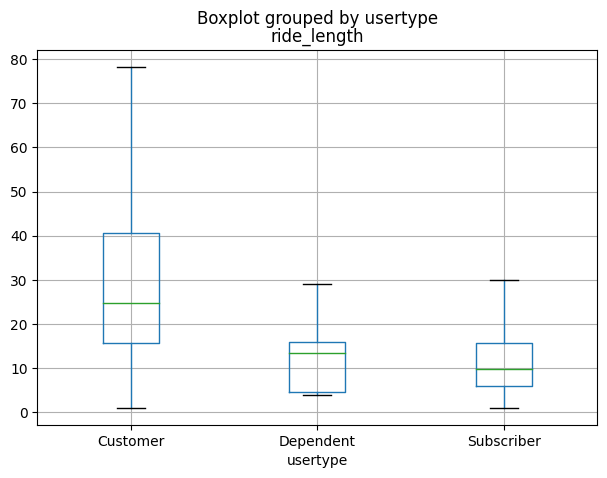

In [30]:
ax = df_map.boxplot(column='ride_length', by='usertype', figsize=(7,5), showfliers=False)

In [31]:
trip_duration = df_map.groupby(['season'])['ride_length'].mean().sort_values(ascending=False)
trip_duration

season
Summer    24.838055
Autumn    19.288869
Spring    18.709618
Winter    14.509616
Name: ride_length, dtype: float64

In [105]:
trip_dist = df_map.groupby(['season'])['ride_distance'].mean().sort_values(ascending=False)
trip_dist

season
Summer    2.433504
Autumn    2.237861
Spring    2.213901
Winter    1.999004
Name: ride_distance, dtype: float64

In [104]:
df_map[['season']].describe()

,season
count,7239933
unique,4
top,Summer
freq,3014656


In [32]:
df_map[['usertype']].describe()

,usertype
count,9754792
unique,3
top,Subscriber
freq,7642149


In [34]:
Gender_Percentage=(df_map['gender'].value_counts()*100)/len(df_map)
Gender_Percentage

Male      52.942347
Female    18.206363
Name: gender, dtype: float64

In [35]:
trip_duration = df_map.groupby(['usertype'])['ride_length'].mean().sort_values(ascending=False)
trip_duration

usertype
Customer      49.028699
Subscriber    13.525380
Dependent     12.530952
Name: ride_length, dtype: float64

In [36]:
df_map[['usertype']].describe(percentiles=[.05, .25, .5, .75, .999])

,usertype
count,9754792
unique,3
top,Subscriber
freq,7642149


In [37]:
df_map['usertype'].value_counts()

Subscriber    7642149
Customer      2112636
Dependent           7
Name: usertype, dtype: int64

In [38]:
Customer_Percentage=(df_map['usertype'].value_counts()/len(df_map['usertype']))*100
print(Customer_Percentage)

Subscriber    67.929610
Customer      18.778820
Dependent      0.000062
Name: usertype, dtype: float64


In [39]:
station_initial = df_map.groupby(['from_station_name'])['from_station_name'].count().sort_values(ascending=False)
print(station_initial.head())

from_station_name
Streeter Dr & Grand Ave         210661
Canal St & Adams St             144537
Clinton St & Madison St         126130
Clinton St & Washington Blvd    125199
Lake Shore Dr & Monroe St       121461
Name: from_station_name, dtype: int64


In [40]:
missing=(df_map.isnull().sum()*100)/len(df_map)
print(missing)

trip_id                   13.291509
start_time                13.291509
end_time                  13.291509
bikeid                    13.291509
tripduration              47.326886
from_station_id           13.291509
from_station_name         13.291509
to_station_id             13.291509
to_station_name           13.291509
usertype                  13.291509
gender                    28.851290
birthyear                 28.646421
Quarter                    0.000000
from_station_latitude     17.322415
from_station_longitude    17.322415
to_station_latitude       17.329455
to_station_longitude      17.329455
startdate_time            13.291509
dayoftheWeek              13.291509
Month                     13.291509
Year                      13.291509
StartingTime              13.291509
season                    13.291509
ride_distance             20.980996
ride_length               13.291509
dtype: float64


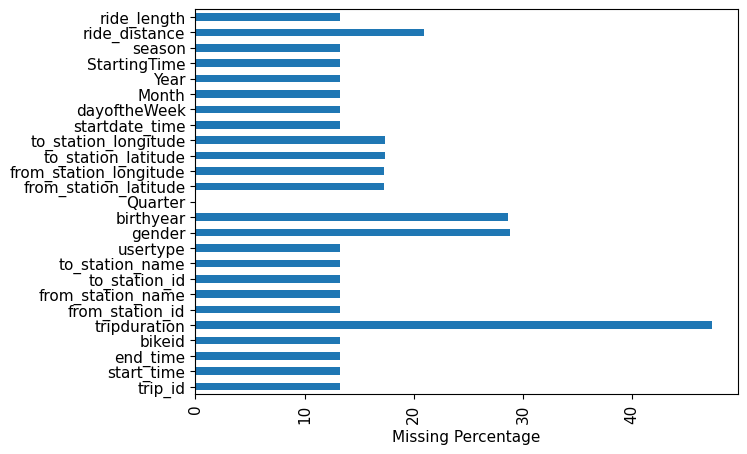

In [41]:
plt.figure(figsize=(7,5))
missing.plot(kind='barh')
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Missing Percentage",fontsize=11)
matplotlib.rcParams['axes.linewidth'] = 0.5

In [42]:
df_map.dropna(subset=['from_station_latitude','from_station_longitude','to_station_latitude','to_station_longitude'], inplace=True)

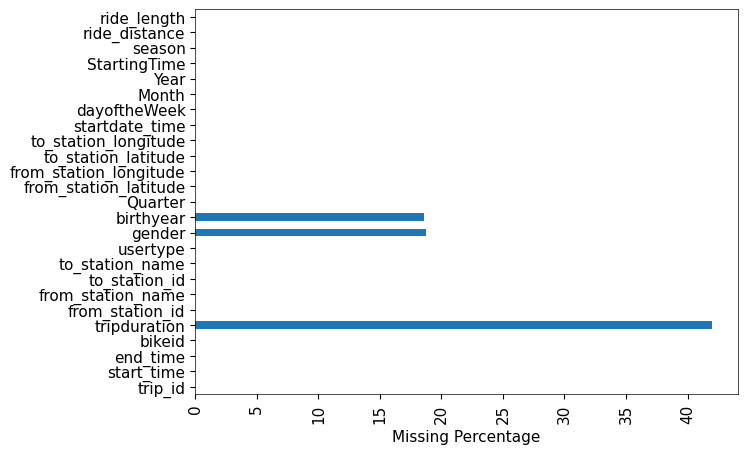

In [43]:
missing=(df_map.isnull().sum()*100)/len(df_map)
plt.figure(figsize=(7,5))
missing.plot(kind='barh')
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Missing Percentage",fontsize=11)
matplotlib.rcParams['axes.linewidth'] = 0.5

In [44]:
print(missing)

trip_id                    0.000000
start_time                 0.000000
end_time                   0.000000
bikeid                     0.000000
tripduration              41.989998
from_station_id            0.000000
from_station_name          0.000000
to_station_id              0.000000
to_station_name            0.000000
usertype                   0.000000
gender                    18.783365
birthyear                 18.558341
Quarter                    0.000000
from_station_latitude      0.000000
from_station_longitude     0.000000
to_station_latitude        0.000000
to_station_longitude       0.000000
startdate_time             0.000000
dayoftheWeek               0.000000
Month                      0.000000
Year                       0.000000
StartingTime               0.000000
season                     0.000000
ride_distance              0.000000
ride_length                0.000000
dtype: float64


In [68]:
Month_wise_Usage=(df_map['Month'].value_counts()*100)/len(df_map)
print(Month_wise_Usage)

July         17.052894
August       17.051836
September    14.308071
October      10.731208
June         10.301667
May           7.962256
November      5.342195
April         5.036954
December      4.030567
March         3.247224
February      2.735115
January       2.200014
Name: Month, dtype: float64


In [78]:
df_map["Month"].describe()

count     8889717
unique         12
top          July
freq      1515954
Name: Month, dtype: object

In [69]:
Season_wise_Sale=(df_map['season'].value_counts()*100)/len(df_map)
print(Season_wise_Sale)

Summer    44.406397
Autumn    30.381473
Spring    16.246434
Winter     8.965696
Name: season, dtype: float64


In [71]:
import plotly.express as px
fig= px.histogram(df_map, x="season", title='Season VS No of Trips')
fig.update_layout(xaxis_title ='Season',yaxis_title = 'Number of Trips')
fig.show()

In [72]:
df_map["dayoftheWeek"].value_counts()

Tuesday      1357688
Thursday     1334880
Wednesday    1325466
Monday       1322739
Friday       1292104
Saturday     1183399
Sunday       1073441
Name: dayoftheWeek, dtype: int64

In [74]:
df_map["dayoftheWeek"].describe(percentiles=[.05, .25, .5, .75, .999])

count     8889717
unique          7
top       Tuesday
freq      1357688
Name: dayoftheWeek, dtype: object

In [75]:
df_map["gender"].describe(percentiles=[.05, .25, .5, .75, .999])

count     7219929
unique          2
top          Male
freq      5370223
Name: gender, dtype: object

In [77]:
trip_distance = df_map.groupby(['gender'])['ride_distance'].mean().sort_values(ascending=False)
trip_distance

gender
Female    2.413838
Male      2.248121
Name: ride_distance, dtype: float64

In [79]:
df_map["Quarter"].value_counts()

Q3     1568149
Q7     1378732
Q11    1356880
Q2     1097099
Q6      974283
Q4      649711
Q12     574682
Q8      562793
Q1      417833
Q9      309555
Name: Quarter, dtype: int64

In [80]:
df_map["Quarter"].describe()

count     8889717
unique         10
top            Q3
freq      1568149
Name: Quarter, dtype: object

In [81]:
Month_wise_Usage=(df_map['dayoftheWeek'].value_counts()*100)/len(df_map)
print(Month_wise_Usage)

Tuesday      15.272567
Thursday     15.016001
Wednesday    14.910103
Monday       14.879428
Friday       14.534816
Saturday     13.311999
Sunday       12.075086
Name: dayoftheWeek, dtype: float64


In [82]:
df_map["dayoftheWeek"].describe()

count     8889717
unique          7
top       Tuesday
freq      1357688
Name: dayoftheWeek, dtype: object

In [83]:
trip_distance = df_map.groupby(['dayoftheWeek'])['ride_distance'].mean().sort_values(ascending=False)
trip_distance

dayoftheWeek
Saturday     2.448362
Sunday       2.385567
Monday       2.311241
Tuesday      2.311054
Wednesday    2.304219
Thursday     2.303156
Friday       2.282199
Name: ride_distance, dtype: float64

In [84]:
trip_distance = df_map.groupby(['dayoftheWeek'])['ride_length'].mean().sort_values(ascending=False)
trip_distance

dayoftheWeek
Sunday       27.209075
Saturday     27.193754
Friday       19.065576
Monday       18.409919
Thursday     17.996575
Tuesday      17.665209
Wednesday    17.566756
Name: ride_length, dtype: float64

In [85]:
trip_distance = df_map.groupby(['usertype'])['ride_distance'].mean().sort_values(ascending=False)
trip_distance

usertype
Customer      2.579072
Subscriber    2.261004
Dependent     0.930644
Name: ride_distance, dtype: float64

In [86]:
df_map["usertype"].describe()

count        8889717
unique             3
top       Subscriber
freq         6906550
Name: usertype, dtype: object

In [93]:
df_map.dropna(subset=['birthyear'], inplace=True)

In [94]:
df_map['member_age'] = (2023-df_map['birthyear']).astype(int)
df_map[['member_age']].describe(percentiles=[.05, .25, .5, .75, .999])

,member_age
count,7.239933e+06
mean,4.026808e+01
std,1.097679e+01
min,6.000000e+00
5%,2.800000e+01
25%,3.200000e+01
50%,3.700000e+01
75%,4.600000e+01
99.9%,8.000000e+01
max,1.350000e+02


In [95]:
minimum = df_map['member_age'].min()
maxium = df_map['member_age'].max()
bins = [minimum, 16, 25, 30, 35, 40, 50, 60, 75, 85, maxium ]
labels = ["0-16", "16-25", "25-30", "30-35", "35-40", "40-50", "50-60", "60-75", "75-85","85-120"]

In [97]:
df_map['age_group'] = pd.cut(df_map['member_age'], bins=bins, right=False, labels=labels)

In [98]:
df_map["age_group"].describe()

count     7239915
unique         10
top         30-35
freq      2008917
Name: age_group, dtype: object

In [99]:
age_wise_Usage=(df_map['age_group'].value_counts()*100)/len(df_map)
print(age_wise_Usage)

30-35     27.747729
35-40     21.834042
40-50     20.839723
50-60     11.224109
25-30      9.344893
60-75      7.793870
16-25      0.876155
75-85      0.283138
85-120     0.055360
0-16       0.000732
Name: age_group, dtype: float64


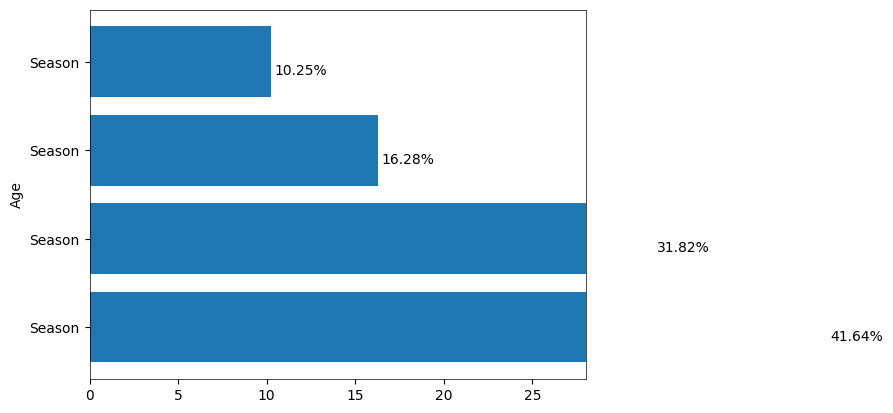

In [100]:
plot_df8 = pd.DataFrame(round(df_map['season'].value_counts(normalize=True)*100,2))
plot_df8 = plot_df8.reset_index()
plot_df8.columns = ['season', 'percentage']
age_group_dtype = pd.api.types.CategoricalDtype(categories=labels, ordered=True)
plot_df8['season'] = plot_df8['season'].astype(age_group_dtype)
plot_df8 = plot_df8.sort_values('season')
plt.barh(data=plot_df8, y=range(plot_df8.shape[0]), tick_label='Season', width='percentage')
for i,v in enumerate(plot_df8['percentage'].values):
    plt.text(v+.2,i-.15,str(v)+'%')
plt.xlim(0,28)
plt.ylabel('Age')
plt.show()

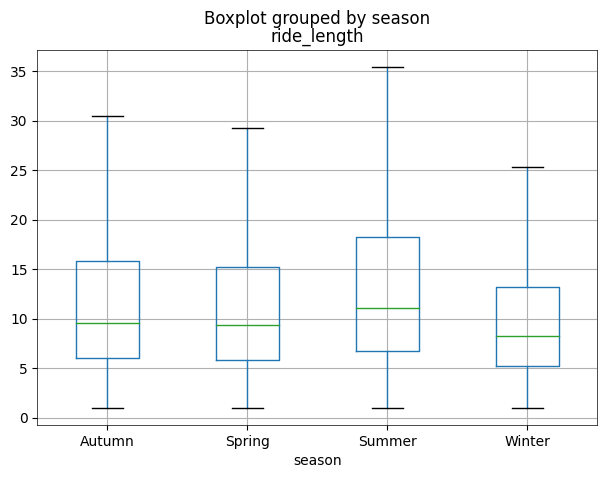

In [106]:
ax = df_map.boxplot(column='ride_length', by='season', figsize=(7,5), showfliers=False)

Text(0, 0.5, 'Count User Activity (percentage)')

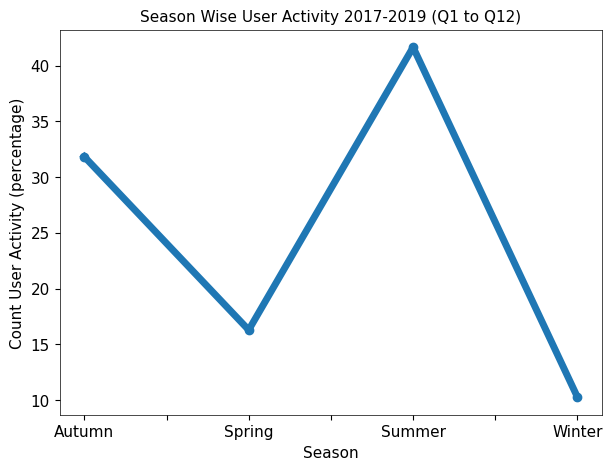

In [109]:
S=(df_map['season'].value_counts()*100)/len(df_map)
S= S.sort_index()
plt.figure(figsize=(7,5))
S.plot(kind='line',marker='o',linewidth=5.0,linestyle='-')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title("Season Wise User Activity 2017-2019 (Q1 to Q12)",fontsize=11)
plt.xlabel("Season",fontsize=11)
plt.ylabel("Count User Activity (percentage)",fontsize=11)

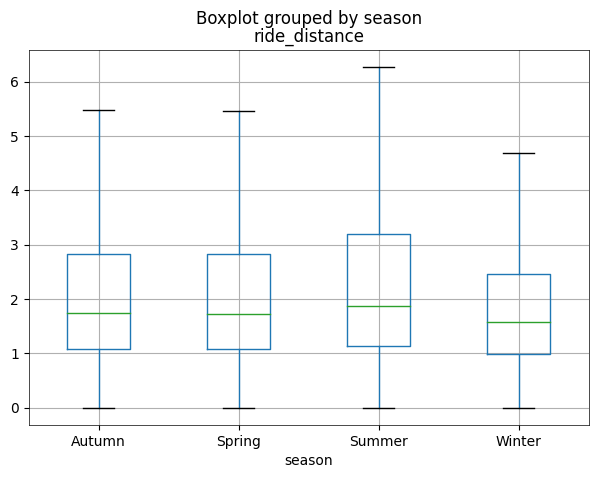

In [110]:
ax = df_map.boxplot(column='ride_distance', by='season', figsize=(7,5), showfliers=False)

In [113]:
df_map["ride_length"].describe()

count    7.239933e+06
mean     1.484467e+01
std      2.454970e+02
min     -5.636667e+01
25%      6.050000e+00
50%      1.000000e+01
75%      1.640000e+01
max      1.910912e+05
Name: ride_length, dtype: float64

In [114]:
df_map["ride_distance"].describe()

count    7.239933e+06
mean     2.290932e+00
std      1.765685e+00
min      0.000000e+00
25%      1.090734e+00
50%      1.772030e+00
75%      2.949063e+00
max      3.705622e+01
Name: ride_distance, dtype: float64

In [116]:
len(df_map['from_station_name'].unique())

580